In [12]:
import pandas as pd
import numpy as np

In [13]:
# df = pd.read_csv("emotions_cleaned smaller.csv")
df = pd.read_csv("Dry_Bean_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [14]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [15]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(13611, 16)
(9527, 16)
(4084, 16)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test) #These are the predicted output values

Accuracy Score        :  0.7220861900097943
Classification Report : 
               precision    recall  f1-score   support

    BARBUNYA       0.48      0.48      0.48       389
      BOMBAY       1.00      0.99      1.00       134
        CALI       0.66      0.64      0.65       501
    DERMASON       0.80      0.90      0.85      1057
       HOROZ       0.70      0.65      0.68       594
       SEKER       0.78      0.60      0.68       579
        SIRA       0.70      0.75      0.72       830

    accuracy                           0.72      4084
   macro avg       0.73      0.72      0.72      4084
weighted avg       0.72      0.72      0.72      4084



<Axes: >

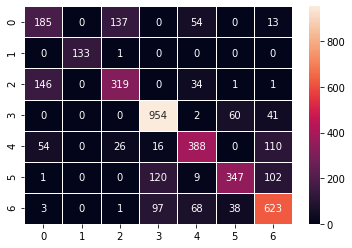

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV

# hyperparameter tunning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],  # weighting schemes
    'metric': ['euclidean', 'manhattan']  # distance metrics
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [20]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.796767874632713


In [23]:
knn_clf=KNeighborsClassifier(metric= 'manhattan', n_neighbors = 5, weights= 'distance')
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

Accuracy Score        :  0.796767874632713
Classification Report : 
               precision    recall  f1-score   support

    BARBUNYA       0.59      0.53      0.56       389
      BOMBAY       1.00      0.99      1.00       134
        CALI       0.71      0.73      0.72       501
    DERMASON       0.86      0.91      0.89      1057
       HOROZ       0.83      0.78      0.80       594
       SEKER       0.88      0.76      0.82       579
        SIRA       0.74      0.83      0.78       830

    accuracy                           0.80      4084
   macro avg       0.80      0.79      0.80      4084
weighted avg       0.80      0.80      0.80      4084



<Axes: >

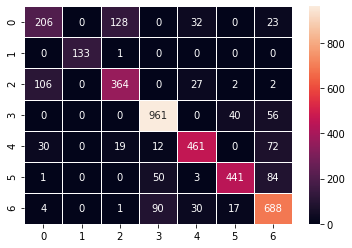

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, ypred))
print("Classification Report : \n", classification_report(y_test, ypred))
cfm=confusion_matrix(y_test,ypred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)